<a href="https://colab.research.google.com/github/daryafralova/PROJECTS/blob/colab/%D0%9E%D0%A6%D0%95%D0%9D%D0%9A%D0%90_%D0%97%D0%90%D0%A0%D0%9F%D0%9B%D0%90%D0%A2%D0%AB_%D0%9F%D0%9E%D0%9B%D0%AC%D0%97%D0%9E%D0%92%D0%90%D0%A2%D0%95%D0%9B%D0%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Сначала создаем 3 отдельных НС:
*   Первая НС будет обрабатывать  только числовые данные (зарплаты)
*   Вторая НС будет обрабатывать только текстовые данные (набор, содержащий информацию о должностях)
*   Третья НС-только сложные текстовые данные (описание опыта работы)

После с применением функционального программирования создаем одну общую НС

#Подключение библиотек и подготовка данных (парсинг базы)

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import StandardScaler # Масштабирование данных
import gdown
import re
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

In [2]:
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l10/hh_fixed.csv', None, quiet=True)

'hh_fixed.csv'

In [3]:
df = pd.read_csv('hh_fixed.csv', index_col=0)
print(df.shape)

df.head()

(62967, 12)


,"Пол, возраст",ЗП,Ищет работу на должность:,Город,Занятость,График,Опыт (двойное нажатие для полной версии),Последенее/нынешнее место работы,Последеняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 29 лет , родился 16 мая 1989",40000 руб.,Специалист по поддержке чата(support team) дом...,"Новороссийск , готов к переезду (Анапа, Геленд...",полная занятость,полный день,Опыт работы 3 года 9 месяцев Специалист по по...,"ООО ""Гольфстрим""",Генеральный директор,Высшее образование 2011 Международный юридиче...,26.04.2019 08:04,Не указано
1,"Мужчина , 38 лет , родился 25 мая 1980",40000 руб.,Системный администратор,"Новосибирск , м. Березовая роща , не готов к ...",полная занятость,полный день,Опыт работы 11 лет 11 месяцев Системный админ...,ООО «Завод модульных технологий»,Системный администратор,Высшее образование 2002 Новосибирский государс...,26.04.2019 04:30,Не указано
2,"Мужчина , 35 лет , родился 14 июня 1983",300000 руб.,DevOps TeamLead / DevOps архитектор,"Москва , готов к переезду , готов к редким ком...",полная занятость,полный день,Опыт работы 12 лет 11 месяцев DevOps TeamLead...,Банк ВТБ (ПАО),Начальник отдела методологии разработки (DevOp...,DevOps TeamLead / DevOps архитектор 300 000 ру...,09.04.2019 14:40,Не указано
3,"Мужчина , 33 года , родился 2 августа 1985",180000 руб.,Руководитель IT отдела,"Москва , м. Щукинская , не готов к переезду ,...","частичная занятость, полная занятость","удаленная работа, полный день",Опыт работы 15 лет 10 месяцев Руководитель IT...,"""Ай-Теко"", ведущий российский системный интегр...",Старший системный администратор,Руководитель IT отдела 180 000 руб. Информацио...,09.04.2019 14:39,Имеется собственный автомобиль
4,"Мужчина , 22 года , родился 1 сентября 1996",40000 руб.,Junior Developer,"Москва , м. Юго-Западная , не готов к переезд...","стажировка, частичная занятость, проектная работа","гибкий график, удаленная работа",Опыт работы 1 год 1 месяц Junior Developer 40...,R-Style SoftLab,Менеджер IT-проектов,Junior Developer 40 000 руб. Информационные те...,29.03.2019 12:40,Не указано


In [ ]:
# Пример данных
n = 0                                     # Индекс в таблице резюме
for i in range(len(df.values[n])):        # Вывод значения каждого столбца
    print('{:>2}  {}'.format(i, df.values[n][i]))

 0  Мужчина ,  29 лет , родился 16 мая 1989
 1  40000 руб.
 2  Специалист по поддержке чата(support team) домашний агент
 3  Новороссийск , готов к переезду (Анапа, Геленджик) , не готов к командировкам
 4  полная занятость
 5  полный день
 6  Опыт работы 3 года 9 месяцев  Специалист по поддержке чата(support team) домашний агент 40 000 руб. Информационные технологии, интернет, телеком Системный администратор Сотовые, Беспроводные технологии Телекоммуникации Занятость: полная занятость График работы: полный день Опыт работы 3 года 9 месяцев Май 2012 — Январь  2016 3 года 9 месяцев ООО "Гольфстрим" Республика Башкортостан Строительство, недвижимость, эксплуатация, проектирование ... Строительство жилищное Управление и эксплуатация недвижимости Генеральный директор Руководство, отладка деловых связей, заключение договоров, развитие организации Ключевые навыки Теперь резюме открыто всему интернету — изменить можно в настройках видимости. Заключение договоров Деловое общение Деловая коммун

Целевой параметр -  колонка ЗП.

Остальные столбцы (за исключением двух последних) мы будем использовать как x_train, в качестве оцениваемых параметров.


In [4]:
# Настройка номеров столбцов
# Дальнейшие вычисления не будут зависеть от порядка столбцов в таблице
# .get_loc() фиксирует номер столбцы в определенной переменной.Это упрощает обращение к столбцу и делает код меньше и понятнее
COL_SEX_AGE     = df.columns.get_loc('Пол, возраст')
COL_SALARY      = df.columns.get_loc('ЗП')
COL_POS_SEEK    = df.columns.get_loc('Ищет работу на должность:')
COL_POS_PREV    = df.columns.get_loc('Последеняя/нынешняя должность')
COL_CITY        = df.columns.get_loc('Город')
COL_EMPL        = df.columns.get_loc('Занятость')
COL_SCHED       = df.columns.get_loc('График')
COL_EXP         = df.columns.get_loc('Опыт (двойное нажатие для полной версии)')
COL_EDU         = df.columns.get_loc('Образование и ВУЗ')
COL_UPDATED     = df.columns.get_loc('Обновление резюме')

**ФУНКЦИИ ДЛЯ ПАРСИНГА(ОБРАБОТКИ) ТЕКСТА**

In [5]:
def purify(x): #очищает текст от лишних символов+приводит все символы к нижнему регистру
    if isinstance(x, str):                # Если значение - строка:
        # Замена концов строк на пробелы, удаление символа с кодом 0xA0,
        # обрезка краевых пробелов и приведение к нижнему регистру
        x = x.replace('\n', ' ').replace('\xa0', '').strip().lower()
    return x

In [8]:
def extract_year(x): #выделяет из строки подстроку вида ДД.ММ.ГГГГ и возвращает значение года
    try:
        return int(re.search(r'\d\d.\d\d.(\d{4})', x)[1])   # Ожидается строка вида 'dd.mm.yyyy ...'

    except (IndexError, TypeError, ValueError): #данная строка сработает если код выполняется с ошибкой, выдаст 0
        return 0

**CОЗДАЕМ СЛОВАРИ И СПИСКИ ЗНАЕЧЕНИЙ ДЛЯ РАЗБИЕНИЯ НА КЛАССЫ**

In [10]:
# Курсы валют для зарплат
currency_rate = {'usd'    : 65.,
                 'kzt'    : 0.17,
                 'грн'    : 2.6,
                 'белруб' : 30.5,
                 'eur'    : 70.,
                 'kgs'    : 0.9,
                 'сум'    : 0.007,
                 'azn'    : 37.5
                }

# Для ускорения работы добавлен счетчик классов, который будет вычислен ниже

# Список порогов возраста
age_class = [0, [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]]

# Список порогов опыта работы в месяцах
experience_class = [0, [7, 13, 25, 37, 61, 97, 121, 157, 193, 241]]

# Классы городов
city_class = [0,
              {'москва'          : 0,
               'санкт-петербург' : 1,
               'новосибирск'     : 2,
               'екатеринбург'    : 2,
               'нижний новгород' : 2,
               'казань'          : 2,
               'челябинск'       : 2,
               'омск'            : 2,
               'самара'          : 2,
               'ростов-на-дону'  : 2,
               'уфа'             : 2,
               'красноярск'      : 2,
               'пермь'           : 2,
               'воронеж'         : 2,
               'волгоград'       : 2,
               'прочие города'   : 3
              }]

# Классы занятости
employment_class = [0,
                    {'стажировка'          : 0,
                     'частичная занятость' : 1,
                     'проектная работа'    : 2,
                     'полная занятость'    : 3
                    }]

# Классы графика работы
schedule_class = [0,
                  {'гибкий график'         : 0,
                   'полный день'           : 1,
                   'сменный график'        : 2,
                   'удаленная работа'      : 3
                  }]

# Классы образования
education_class = [0,
                   {'высшее образование'   : 0,
                    'higher education'     : 0,
                    'среднее специальное'  : 1,
                    'неоконченное высшее'  : 2,
                    'среднее образование'  : 3
                   }]
#0  чуть позже будут заменены на кол-во классов

In [11]:
# Вычисление счетчиков для данных разбиения
for class_desc in [age_class,
                   experience_class,
                   city_class,
                   employment_class,
                   schedule_class,
                   education_class]:
    if isinstance(class_desc[1], list):
        class_desc[0] = len(class_desc[1]) + 1
    else:
        class_desc[0] = max(class_desc[1].values()) + 1

In [12]:
age_class

[11, [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]]

In [13]:
def int_to_ohe(arg, class_list):

    # Определение размерности выходного вектора
    num_classes = class_list[0]

    # Поиск верного интервала для входного значения
    for i in range(num_classes - 1):
        if arg < class_list[1][i]:
            cls = i                       # Интервал найден - назначение класса
            break
    else:                                 # Внимание: for/else
        cls = num_classes - 1             # Интервал не найден - последний класс

    # Возврат в виде one hot encoding-вектора
    return utils.to_categorical(cls, num_classes)

In [14]:
age = 32
int_to_ohe(age, age_class)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
# Общая функция преобразования строки к multi-вектору
# На входе данные и словарь сопоставления подстрок классам

def str_to_multi(arg, class_dict): #сопоставляет строковому значению метку класса
    # Определение размерности выходного вектора
    num_classes = class_dict[0]

    # Создание нулевого вектора
    result = np.zeros(num_classes)

    # Поиск значения в словаре и, если найдено,
    # выставление 1. на нужной позиции
    for value, cls in class_dict[1].items():
        if value in arg:
            result[cls] = 1.

    return result

In [16]:
text = 'полная занятость'
print(text)
print(str_to_multi(text, employment_class))

полная занятость
[0. 0. 0. 1.]


In [17]:
base_update_year = 2019

In [18]:
# Разбор значений пола, возраста
def extract_sex_age_years(arg):  #выделяет из строки информацию про пол и возраст человека
    # Ожидается, что значение содержит "мужчина" или "женщина"
    # Если "мужчина" - результат 1., иначе 0.
    sex = 1. if 'муж' in arg else 0.

    try:
        # Выделение года и вычисление возраста
        years = base_update_year - int(re.search(r'\d{4}', arg)[0])

    except (IndexError, TypeError, ValueError):
        # В случае ошибки год равен 0
        years = 0

    return sex, years

In [20]:
# Преобразование значения возраста в one hot encoding
def age_years_to_ohe(arg):
    return int_to_ohe(arg, age_class)

In [21]:
print(age_years_to_ohe(32))

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [22]:
# Преобразование данных об опыте работы в one hot encoding
def experience_months_to_ohe(arg):
    return int_to_ohe(arg, experience_class)

In [23]:
print(experience_months_to_ohe(100))

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [24]:
# Разбор значения зарплаты
def extract_salary(arg): #выделяет из строки значение зарплаты и переводит его в курс рубля
    try:
        # Выделение числа и преобразование к float
        value = float(re.search(r'\d+', arg)[0])

        # Поиск символа валюты в строке, и, если найдено,
        # приведение к рублю по курсу валюты
        for currency, rate in currency_rate.items():
            if currency in arg:
                value *= rate
                break

    except TypeError:
        # Если не получилось выделить число - вернуть 0
        value = 0.

    return value / 1000.                  # В тысячах рублей

In [25]:
print(extract_salary('40000 руб.'))
print(extract_salary('40000 eur.'))

40.0
2800.0


In [26]:
# Разбор данных о городe и преобразование в one hot encoding
def extract_city_to_ohe(arg):
    # Определение размерности выходного вектора
    num_classes = city_class[0]

    # Разбивка на слова
    split_array = re.split(r'[ ,.:()?!]', arg)

    # Поиск города в строке и присвоение ему класса
    for word in split_array:
        city_cls = city_class[1].get(word, -1)
        if city_cls >= 0:
            break
    else:                                 # Внимание: for/else
        # Город не в city_class - значит его класс "прочие города"
        city_cls = num_classes - 1

    # Возврат в виде one hot encoding-вектора
    return utils.to_categorical(city_cls, num_classes)

In [27]:
print(extract_city_to_ohe('москва , м. юго-западная , не готов к переезду'))

[1. 0. 0. 0.]


In [28]:
# Разбор данных о желаемой занятости и преобразование в multi
def extract_employment_to_multi(arg):
    return str_to_multi(arg, employment_class)

In [29]:
# Разбор данных о желаемом графике работы и преобразование в multi
def extract_schedule_to_multi(arg):
    return str_to_multi(arg, schedule_class)

In [30]:
# Разбор данных об образовании и преобразование в multi
def extract_education_to_multi(arg):
    result = str_to_multi(arg, education_class)

    # Поправка: неоконченное высшее не может быть одновременно с высшим
    if result[2] > 0.:
        result[0] = 0.

    return result

In [31]:
print(extract_employment_to_multi('полная занятость'))
print(extract_schedule_to_multi('полный день'))
print(extract_education_to_multi('высшее образование 2011'))

[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]


In [32]:
# Разбор данных об опыте работы - результат в месяцах
def extract_experience_months(arg):
    try:
        # Выделение количества лет, преобразование в int
        years = int(re.search(r'(\d+)\s+(год.?|лет)', arg)[1])

    except (IndexError, TypeError, ValueError):
        # Неудача - количество лет равно 0
        years = 0

    try:
        # Выделение количества месяцев, преобразование в int
        months = int(re.search(r'(\d+)\s+месяц', arg)[1])

    except (IndexError, TypeError, ValueError):
        # Неудача - количество месяцев равно 0
        months = 0

    # Возврат результата в месяцах
    return years * 12 + months

In [33]:
print(extract_experience_months('опыт работы 3 года 9 месяцев'))

45


#Подготовка выборки (зарплата) и обучение первой НС

In [34]:
def extract_row_data(row):

    # Извлечение и преобразование данных
    sex, age = extract_sex_age_years(row[COL_SEX_AGE])      # Пол, возраст
    sex_vec = np.array([sex])                               # Пол в виде вектора
    age_ohe = age_years_to_ohe(age)                         # Возраст в one hot encoding
    city_ohe = extract_city_to_ohe(row[COL_CITY])           # Город
    empl_multi = extract_employment_to_multi(row[COL_EMPL]) # Тип занятости
    sсhed_multi = extract_schedule_to_multi(row[COL_SCHED]) # График работы
    edu_multi = extract_education_to_multi(row[COL_EDU])    # Образование
    exp_months = extract_experience_months(row[COL_EXP])    # Опыт работы в месяцах
    exp_ohe = experience_months_to_ohe(exp_months)          # Опыт работы в one hot encoding
    salary = extract_salary(row[COL_SALARY])                # Зарплата в тысячах рублей
    salary_vec = np.array([salary])                         # Зарплата в виде вектора

    # Объединение всех входных данных в один общий вектор
    x_data = np.hstack([sex_vec,
                        age_ohe,
                        city_ohe,
                        empl_multi,
                        sсhed_multi,
                        edu_multi,
                        exp_ohe])

    # Возврат входных данных и выходных (зарплаты)
    return x_data, salary_vec


# Создание общей выборки
def construct_train_data(row_list):
    x_data = []
    y_data = []

    for row in row_list:
        x, y = extract_row_data(row)
        if y[0] > 0:                      # Данные добавляются, только если есть зарплата
            x_data.append(x)
            y_data.append(y)

    return np.array(x_data), np.array(y_data)

In [35]:
# Формирование выборки из загруженного набора данных
x_train_01, y_train = construct_train_data(df.values)

In [36]:
# Форма наборов параметров и зарплат
print(x_train_01.shape)
print(y_train.shape)

# Пример обработанных данных
n = 0
print(x_train_01[n])
print(y_train[n])

(62967, 39)
(62967, 1)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[40.]


In [38]:
#Функция отрисовки графика истории обучения
def plot_history(history):
    plt.plot(history.history['mae'],
            label='Средняя абсолютная ошибка на обучающем наборе')
    plt.plot(history.history['val_mae'],
            label='Средняя абсолютная ошибка на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Средняя абсолютная ошибка')
    plt.legend()
    plt.show()

Epoch 1/50
210/210 [==============================] - 5s 5ms/step - loss: 10852.3223 - mae: 75.3137 - val_loss: 11754.9033 - val_mae: 78.6033
Epoch 2/50
210/210 [==============================] - 1s 5ms/step - loss: 9982.7363 - mae: 69.4457 - val_loss: 10490.7080 - val_mae: 70.4839
Epoch 3/50
210/210 [==============================] - 1s 5ms/step - loss: 8713.8184 - mae: 60.3940 - val_loss: 8864.7354 - val_mae: 59.4231
Epoch 4/50
210/210 [==============================] - 1s 4ms/step - loss: 7299.5718 - mae: 50.5574 - val_loss: 7347.3911 - val_mae: 50.1075
Epoch 5/50
210/210 [==============================] - 1s 5ms/step - loss: 6143.7681 - mae: 44.5172 - val_loss: 6300.6245 - val_mae: 45.9403
Epoch 6/50
210/210 [==============================] - 1s 5ms/step - loss: 5474.2480 - mae: 43.2501 - val_loss: 5759.8027 - val_mae: 45.4898
Epoch 7/50
210/210 [==============================] - 1s 7ms/step - loss: 5174.3486 - mae: 43.8980 - val_loss: 5520.3765 - val_mae: 45.9717
Epoch 8/50
210/21

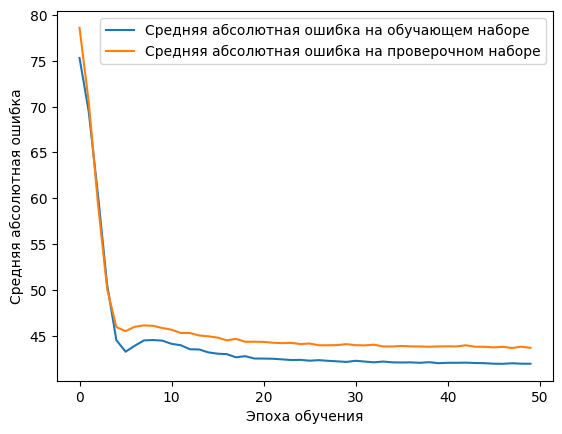

In [39]:
# Обучение модели на простых данных
model_simple = Sequential()
model_simple.add(BatchNormalization(input_dim=x_train_01.shape[1]))
model_simple.add(Dense(128, activation='relu'))
model_simple.add(Dense(1000, activation='tanh'))
model_simple.add(Dense(100, activation='relu'))
model_simple.add(Dense(1, activation='linear'))

model_simple.compile(optimizer=Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])

history = model_simple.fit(x_train_01,
                    y_train,
                    epochs=50,
                    batch_size=256,
                    validation_split=0.15,
                    verbose=1)

plot_history(history)

In [40]:
# Проверка работы сети - предсказание на тренировочной выборке
pred = model_simple.predict(x_train_01)

# Расчет среднего значения ошибки
print((abs(pred - y_train)).mean())         # Расчет вручную
print(mean_absolute_error(pred, y_train))   # Расчет с помощью готовой функции

1968/1968 [==============================] - 5s 2ms/step
42.26019773193128
42.26019773193128


Полученные значения  означают, что наша модель ошибается в среднем на 42 тысячи рублей.

In [42]:
# Функция оценки результатов и вывода оценки(разбор между реальными и предсказанными значениями)

def eval_net(model, x_train, y_train, y_scaler = None, n = 10, limit = 1000.): # производит оценку результатов работы yc

    pred = model.predict(x_train)             # Предсказание на тренировочной выборке (метод predict принимает на вход данные, по которым нужно сделать предсказания)
    if y_scaler:                              # Если есть нормирование - то денормировать
        pred = y_scaler.inverse_transform(pred)

    print('Средняя абсолютная ошибка:', mean_absolute_error(pred, y_train), '\n')

    for i in range(n):
        print('Реальное значение: {:6.2f}  Предсказанное значение: {:6.2f}  Разница: {:6.2f}'.format(y_train[i, 0],
                                                                                                    pred[i, 0],
                                                                                                    abs(y_train[i, 0] - pred[i, 0])))
    # Построение картинки разброса предсказанных и верных значений зарплаты
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.scatter(y_train, pred)                 # Отрисовка точечного графика
    ax.set_xlim(0, limit)                     # Пределы по x, y
    ax.set_ylim(0, limit)
    ax.plot(plt.xlim(), plt.ylim(), 'r')      # Отрисовка диагональной линии
    plt.xlabel('Правильные значения')
    plt.ylabel('Предсказания')
    plt.grid()
    plt.show()

1968/1968 [==============================] - 3s 2ms/step
Средняя абсолютная ошибка: 42.26019773193128 

Реальное значение:  40.00  Предсказанное значение:  60.48  Разница:  20.48
Реальное значение:  40.00  Предсказанное значение:  96.25  Разница:  56.25
Реальное значение: 300.00  Предсказанное значение:  95.07  Разница: 204.93
Реальное значение: 180.00  Предсказанное значение: 103.57  Разница:  76.43
Реальное значение:  40.00  Предсказанное значение:  40.95  Разница:   0.95
Реальное значение: 200.00  Предсказанное значение:  95.07  Разница: 104.93
Реальное значение: 120.00  Предсказанное значение: 111.51  Разница:   8.49
Реальное значение:  50.00  Предсказанное значение:  84.60  Разница:  34.60
Реальное значение:  60.00  Предсказанное значение:  64.52  Разница:   4.52
Реальное значение:  70.00  Предсказанное значение:  77.25  Разница:   7.25


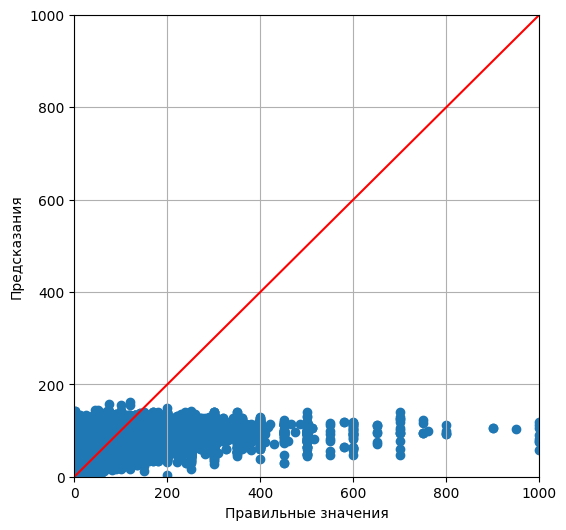

In [43]:
eval_net(model_simple, x_train_01, y_train)

Значения на графике должны располагаться вдоль красной диагональной линии

#Нормализация данных (зарплата) и повторное обучение

На следующем шаге мы нормализуем значение зарплаты, которое предсказывает нейронная сеть

In [44]:
# Для нормализации данных используется готовый инструмент
y_scaler = StandardScaler()

# Нормализация выходных данных по стандартному нормальному распределению
y_train_scaled = y_scaler.fit_transform(y_train)

In [45]:
# Проверка нормализации
print(y_train_scaled.shape)
print(f'Оригинальное значение зарплаты:  {y_train[1, 0]}')
print(f'Нормированное значение зарплаты: {y_train_scaled[1, 0]}')

# Вывод границ ненормализованных и нормализованных данных
print(y_train.mean(), y_train.std())
print(y_train_scaled.mean(), y_train_scaled.std())

(62967, 1)
Оригинальное значение зарплаты:  40.0
Нормированное значение зарплаты: -0.5247285785360603
77.9847331935776 72.3892975289266
-1.2457941148207006e-16 0.9999999999999998


В итоге нормирования  полученный массив `y_train_scaled` обладает следующими характеристиками:
- среднее значение массива практически равно 0
- среднеквадратичное отклонение практически равно 1

Подобные значения значительно лучше анализируются нейронными сетями. Проверим это на нашей задаче:


Epoch 1/50
210/210 [==============================] - 3s 5ms/step - loss: 0.9221 - mae: 0.6008 - val_loss: 0.9794 - val_mae: 0.6365
Epoch 2/50
210/210 [==============================] - 1s 6ms/step - loss: 0.8830 - mae: 0.5872 - val_loss: 0.9476 - val_mae: 0.6055
Epoch 3/50
210/210 [==============================] - 1s 6ms/step - loss: 0.8745 - mae: 0.5826 - val_loss: 0.9405 - val_mae: 0.6018
Epoch 4/50
210/210 [==============================] - 1s 6ms/step - loss: 0.8713 - mae: 0.5811 - val_loss: 0.9351 - val_mae: 0.6104
Epoch 5/50
210/210 [==============================] - 1s 5ms/step - loss: 0.8691 - mae: 0.5807 - val_loss: 0.9348 - val_mae: 0.5999
Epoch 6/50
210/210 [==============================] - 1s 5ms/step - loss: 0.8667 - mae: 0.5785 - val_loss: 0.9330 - val_mae: 0.6015
Epoch 7/50
210/210 [==============================] - 1s 5ms/step - loss: 0.8655 - mae: 0.5784 - val_loss: 0.9334 - val_mae: 0.5965
Epoch 8/50
210/210 [==============================] - 1s 5ms/step - loss: 0.

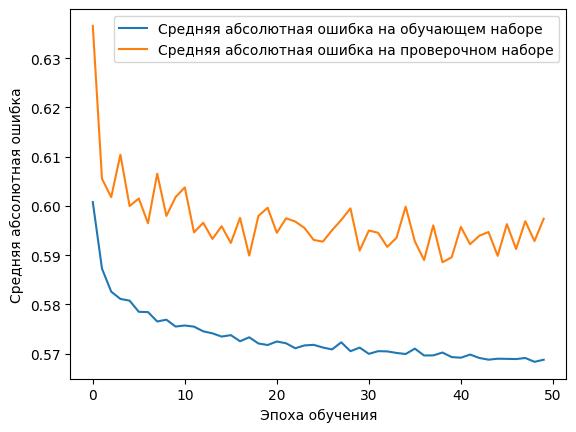

In [46]:
# Обучение модели на простых данных с нормализованной зарплатой
model_simple = Sequential()
model_simple.add(BatchNormalization(input_dim=x_train_01.shape[1]))
model_simple.add(Dense(128, activation='relu'))
model_simple.add(Dense(1000, activation='tanh'))
model_simple.add(Dense(100, activation='relu'))
model_simple.add(Dense(1, activation='linear'))

model_simple.compile(optimizer=Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])

history = model_simple.fit(x_train_01,
                    y_train_scaled,
                    epochs=50,
                    batch_size=256,
                    validation_split=0.15,
                    verbose=1)

plot_history(history)

**Оценка результатов**


1968/1968 [==============================] - 4s 2ms/step
Средняя абсолютная ошибка: 41.69946115030906 

Реальное значение:  40.00  Предсказанное значение:  61.26  Разница:  21.26
Реальное значение:  40.00  Предсказанное значение:  92.73  Разница:  52.73
Реальное значение: 300.00  Предсказанное значение:  94.65  Разница: 205.35
Реальное значение: 180.00  Предсказанное значение:  92.84  Разница:  87.16
Реальное значение:  40.00  Предсказанное значение:  35.13  Разница:   4.87
Реальное значение: 200.00  Предсказанное значение:  94.65  Разница: 105.35
Реальное значение: 120.00  Предсказанное значение: 118.29  Разница:   1.71
Реальное значение:  50.00  Предсказанное значение:  59.24  Разница:   9.24
Реальное значение:  60.00  Предсказанное значение:  51.61  Разница:   8.39
Реальное значение:  70.00  Предсказанное значение:  77.60  Разница:   7.60


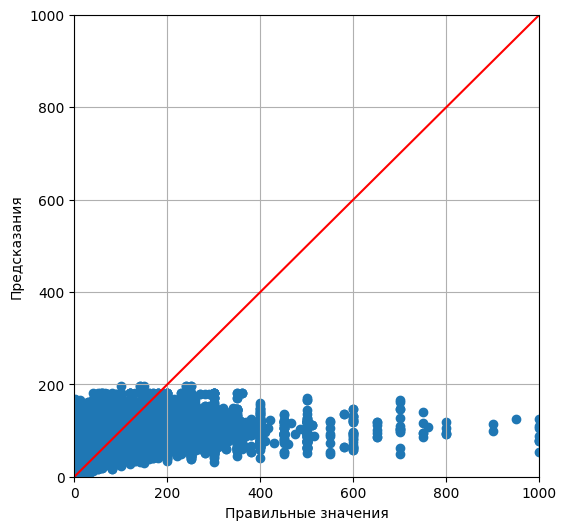

In [47]:
eval_net(model_simple, x_train_01, y_train, y_scaler)

Полученное значение ошибки немного лучше предыдущего 40 тысяч против 42.


#Подготовка выборки (должность) и обучение второй НС


Вначале соберем обучающий набор на основе столбцов с текущей и желаемой должностью:

In [48]:
# Функция извлечения данных о профессии
def extract_prof_text(row_list):
    result = []

    # Для всех строк таблицы: собрать значения
    # столбцов желаемой и прошлой должности
    # если есть информация о зарплате

    for row in row_list:
        if extract_salary(row[COL_SALARY]) > 0:
            result.append(str(row[COL_POS_SEEK]) + ' ' + str(row[COL_POS_PREV]))

    # Возврат в виде массива
    return result

In [49]:
# Извлечение текстов о профессии для выборки
prof_text = extract_prof_text(df.values)

# Пример текста о профессии из резюме
print(df.values[120])
print(prof_text[120])

['Мужчина ,  33 года , родился 8 октября 1985' '250000 руб.'
 'Руководитель BI' 'Москва , не готов к переезду , готов к командировкам'
 'полная занятость' 'полный день'
 'Опыт работы 11 лет 6 месяцев  Руководитель BI 250 000 руб. Информационные технологии, интернет, телеком Инженер Аналитик Занятость: полная занятость График работы: полный день Опыт работы 11 лет 6 месяцев Декабрь 2017 — по настоящее время 1 год 5 месяцев ЭркаФарм Россия , erkapharm.com Медицина, фармацевтика, аптеки ... Аптека, оптика Руководитель отдела аналитики Стратегическая цель: создание единой корпоративной автоматизированной информационно-аналитической системы бизнес анализа; MDM: ведение и поддержка в актуальном состоянии мастер-справочников компании; разработка новых справочников\\атрибутов для обеспечения деятельности подразделений компании; контроль бизнес-процессов в части, касающейся мастер-данных; написание документов, закрепляющих регламентные нормы по ведению мастер-справочников; ETL: загрузка данных 

In [50]:
# Преобразование текстовых данных в числовые/векторные для обучения нейросетью
tokenizer = Tokenizer(num_words=3000, # объем словаря
                      filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', # убираемые из текста ненужные символы
                      lower=True, # приведение слов к нижнему регистру
                      split=' ', # разделитель слов
                      oov_token='unknown', # указание разделять по словам, а не по единичным символам
                      char_level=False # токен для слов, которые не вошли в словарь
                      )

tokenizer.fit_on_texts(prof_text)

In [51]:
items = list(tokenizer.word_index.items())       # Получение индексов слов
print(items[:50])                                # Посмотр 50 самых часто встречающихся слов
print("Размер словаря", len(items))              # Длина словаря

[('unknown', 1), ('инженер', 2), ('специалист', 3), ('по', 4), ('менеджер', 5), ('администратор', 6), ('руководитель', 7), ('системный', 8), ('отдела', 9), ('программист', 10), ('ведущий', 11), ('проектов', 12), ('разработчик', 13), ('it', 14), ('поддержки', 15), ('аналитик', 16), ('и', 17), ('технической', 18), ('проекта', 19), ('начальник', 20), ('ит', 21), ('директор', 22), ('интернет', 23), ('с', 24), ('главный', 25), ('старший', 26), ('оператор', 27), ('продажам', 28), ('работе', 29), ('технический', 30), ('монтажник', 31), ('систем', 32), ('developer', 33), ('web', 34), ('связи', 35), ('клиентами', 36), ('информационных', 37), ('консультант', 38), ('группы', 39), ('1с', 40), ('технологий', 41), ('заместитель', 42), ('manager', 43), ('техник', 44), ('дизайнер', 45), ('помощник', 46), ('службы', 47), ('магазина', 48), ('сервисный', 49), ('маркетолог', 50)]
Размер словаря 10025


In [52]:
# Преобразование текстов в последовательность индексов согласно частотному словарю
prof_seq = tokenizer.texts_to_sequences(prof_text)

**Создание обучающей и проверочной выборок**


In [53]:
# Преобразование последовательностей индексов в bag of words
x_train_prof_01 = tokenizer.sequences_to_matrix(prof_seq)

In [54]:
# Проверка результата
print(x_train_prof_01.shape)

(62967, 3000)


In [55]:
# Проверка получившихся данных
n = 0
print(prof_text[n])                       # Профессия в тексте
print(prof_seq[n])                        # Профессия в индексах слов
print(x_train_prof_01[n][0:100])          # Профессия в bag of words

Специалист по поддержке чата(support team) домашний агент Генеральный директор
[3, 4, 130, 987, 235, 114, 1, 346, 168, 22]
[0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [56]:
# Освобождение памяти от ненужных более объектов
del prof_text, prof_seq, tokenizer

**Обучение модели на простых текстовых данных**


Epoch 1/50
210/210 [==============================] - 2s 7ms/step - loss: 0.9867 - mae: 0.6449 - val_loss: 1.0657 - val_mae: 0.6624
Epoch 2/50
210/210 [==============================] - 1s 5ms/step - loss: 0.9822 - mae: 0.6416 - val_loss: 1.0604 - val_mae: 0.6587
Epoch 3/50
210/210 [==============================] - 1s 5ms/step - loss: 0.9751 - mae: 0.6366 - val_loss: 1.0518 - val_mae: 0.6542
Epoch 4/50
210/210 [==============================] - 1s 5ms/step - loss: 0.9648 - mae: 0.6310 - val_loss: 1.0397 - val_mae: 0.6482
Epoch 5/50
210/210 [==============================] - 1s 5ms/step - loss: 0.9513 - mae: 0.6241 - val_loss: 1.0247 - val_mae: 0.6406
Epoch 6/50
210/210 [==============================] - 1s 5ms/step - loss: 0.9350 - mae: 0.6154 - val_loss: 1.0063 - val_mae: 0.6323
Epoch 7/50
210/210 [==============================] - 1s 5ms/step - loss: 0.9159 - mae: 0.6064 - val_loss: 0.9852 - val_mae: 0.6222
Epoch 8/50
210/210 [==============================] - 1s 5ms/step - loss: 0.

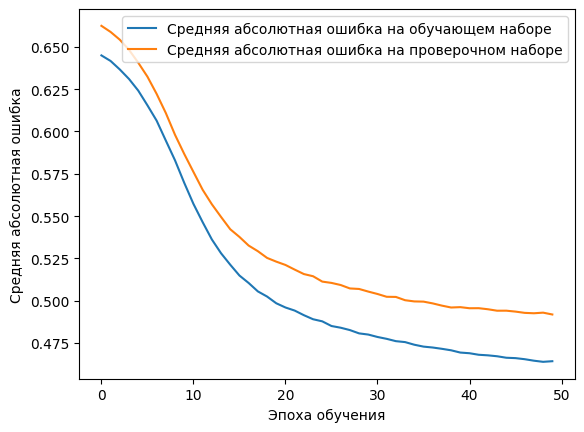

In [57]:
# Обучение модели на данных о профессии
model_prof = Sequential()
model_prof.add(Dense(20, activation='relu', input_dim=x_train_prof_01.shape[1]))
model_prof.add(Dense(500, activation='relu'))
model_prof.add(Dense(1, activation='linear'))

model_prof.compile(optimizer=Adagrad(learning_rate=1e-3), loss='mse', metrics=['mae'])

history = model_prof.fit(x_train_prof_01,
                    y_train_scaled,
                    batch_size=256,
                    epochs=50,
                    validation_split=0.15,
                    verbose=1)

plot_history(history)

**Оценка результатов**


1968/1968 [==============================] - 3s 2ms/step
Средняя абсолютная ошибка: 33.846109371172155 

Реальное значение:  40.00  Предсказанное значение: 116.61  Разница:  76.61
Реальное значение:  40.00  Предсказанное значение:  53.38  Разница:  13.38
Реальное значение: 300.00  Предсказанное значение: 206.23  Разница:  93.77
Реальное значение: 180.00  Предсказанное значение: 110.77  Разница:  69.23
Реальное значение:  40.00  Предсказанное значение:  62.25  Разница:  22.25
Реальное значение: 200.00  Предсказанное значение: 240.08  Разница:  40.08
Реальное значение: 120.00  Предсказанное значение:  67.08  Разница:  52.92
Реальное значение:  50.00  Предсказанное значение:  32.49  Разница:  17.51
Реальное значение:  60.00  Предсказанное значение:  59.55  Разница:   0.45
Реальное значение:  70.00  Предсказанное значение:  41.29  Разница:  28.71


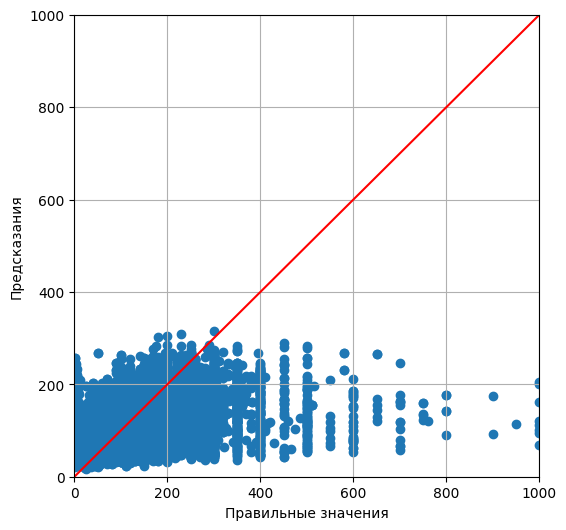

In [58]:
eval_net(model_prof, x_train_prof_01, y_train, y_scaler)

Мы получили лучшее на данный момент значение ошибки: 33 тыс. руб

#Подготовка выборки (опыт работы) и обучение третьей НС


In [59]:
# Функция извлечения данных описания опыта работы
def extract_exp_text(row_list):
    result = []

    # Для всех строк таблицы: собрать значения опыта работы,
    # если есть информация о зарплате
    for row in row_list:
        if extract_salary(row[COL_SALARY]) > 0:
            result.append(str(row[COL_EXP]))

    # Возврат в виде массива
    return result

In [60]:
# Извлечение текстов об опыте работы для выборки
exp_text = extract_exp_text(df.values)

# Пример текста об опыте работы из резюме
print(df.values[120])
print(exp_text[120])

['Мужчина ,  33 года , родился 8 октября 1985' '250000 руб.'
 'Руководитель BI' 'Москва , не готов к переезду , готов к командировкам'
 'полная занятость' 'полный день'
 'Опыт работы 11 лет 6 месяцев  Руководитель BI 250 000 руб. Информационные технологии, интернет, телеком Инженер Аналитик Занятость: полная занятость График работы: полный день Опыт работы 11 лет 6 месяцев Декабрь 2017 — по настоящее время 1 год 5 месяцев ЭркаФарм Россия , erkapharm.com Медицина, фармацевтика, аптеки ... Аптека, оптика Руководитель отдела аналитики Стратегическая цель: создание единой корпоративной автоматизированной информационно-аналитической системы бизнес анализа; MDM: ведение и поддержка в актуальном состоянии мастер-справочников компании; разработка новых справочников\\атрибутов для обеспечения деятельности подразделений компании; контроль бизнес-процессов в части, касающейся мастер-данных; написание документов, закрепляющих регламентные нормы по ведению мастер-справочников; ETL: загрузка данных 

In [61]:
# Преобразование текстовых данных в числовые/векторные для обучения нейросетью

# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(num_words=3000, # объем словаря
                      filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', # убираемые из текста ненужные символы
                      lower=True, # приведение слов к нижнему регистру
                      split=' ', # разделитель слов
                      oov_token='unknown', # указание разделять по словам, а не по единичным символам
                      char_level=False # токен для слов, которые не вошли в словарь
                      )

# Построение частотного словаря по текстам профессий
tokenizer.fit_on_texts(exp_text)

In [62]:
items = list(tokenizer.word_index.items())       # Получение индексов слов
print(items[:50])                                # Посмотр 50 самых часто встречающихся слов
print("Размер словаря", len(items))              # Длина словаря

[('unknown', 124327), ('и', 2), ('в', 3), ('по', 4), ('с', 5), ('на', 6), ('работы', 7), ('месяцев', 8), ('•', 9), ('для', 10), ('1', 11), ('разработка', 12), ('ru', 13), ('интернет', 14), ('2', 15), ('работа', 16), ('опыт', 17), ('года', 18), ('интеграция', 19), ('месяца', 20), ('3', 21), ('москва', 22), ('системная', 23), ('технологии', 24), ('www', 25), ('время', 26), ('системы', 27), ('год', 28), ('лет', 29), ('контроль', 30), ('настройка', 31), ('ооо', 32), ('информационные', 33), ('оборудования', 34), ('компании', 35), ('4', 36), ('5', 37), ('бизнес', 38), ('7', 39), ('поддержка', 40), ('организация', 41), ('2018', 42), ('сети', 43), ('ит', 44), ('8', 45), ('администрирование', 46), ('2017', 47), ('данных', 48), ('систем', 49), ('инженер', 50)]
Размер словаря 325174


In [63]:
# Преобразование текстов в последовательность индексов согласно частотному словарю
exp_seq = tokenizer.texts_to_sequences(exp_text)

**Создание обучающей и проверочной выборок**

In [64]:
# Преобразование последовательностей индексов в bag of words
x_train_exp_01 = tokenizer.sequences_to_matrix(exp_seq)

In [65]:
# Проверка результата
print(x_train_exp_01.shape)
print(x_train_exp_01[0][0:100])

(62967, 3000)
[0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0.]


In [66]:
# Проверка получившихся данных
n = 0
print(exp_text[n])                       # Опыт работы в тексте
print(exp_seq[n])                        # Опыт работы в индексах слов
print(x_train_exp_01[n][0:100])          # Опыт работы в bag of words

Опыт работы 3 года 9 месяцев  Специалист по поддержке чата(support team) домашний агент 40 000 руб. Информационные технологии, интернет, телеком Системный администратор Сотовые, Беспроводные технологии Телекоммуникации Занятость: полная занятость График работы: полный день Опыт работы 3 года 9 месяцев Май 2012 — Январь  2016 3 года 9 месяцев ООО "Гольфстрим" Республика Башкортостан Строительство, недвижимость, эксплуатация, проектирование ... Строительство жилищное Управление и эксплуатация недвижимости Генеральный директор Руководство, отладка деловых связей, заключение договоров, развитие организации Ключевые навыки Теперь резюме открыто всему интернету — изменить можно в настройках видимости. Заключение договоров Деловое общение Деловая коммуникация Пользователь ПК Ведение переговоров Управление персоналом Деловая переписка Составление договоров Телефонные переговоры Грамотная речь MS Outlook Водительское удостоверение категории B Работа в команде Возникли неполадки. Попробуйте еще 

In [67]:
# Освобождение памяти от ненужных более объектов
del exp_text, exp_seq, tokenizer

**Обучение модели**


Epoch 1/50
210/210 [==============================] - 4s 7ms/step - loss: 0.5702 - mae: 0.4175 - val_loss: 0.5196 - val_mae: 0.4057
Epoch 2/50
210/210 [==============================] - 1s 5ms/step - loss: 0.4203 - mae: 0.3567 - val_loss: 0.5048 - val_mae: 0.4032
Epoch 3/50
210/210 [==============================] - 1s 5ms/step - loss: 0.3127 - mae: 0.3287 - val_loss: 0.4871 - val_mae: 0.3728
Epoch 4/50
210/210 [==============================] - 1s 5ms/step - loss: 0.2248 - mae: 0.2921 - val_loss: 0.4680 - val_mae: 0.3691
Epoch 5/50
210/210 [==============================] - 1s 5ms/step - loss: 0.1730 - mae: 0.2644 - val_loss: 0.4619 - val_mae: 0.3620
Epoch 6/50
210/210 [==============================] - 1s 5ms/step - loss: 0.1502 - mae: 0.2488 - val_loss: 0.4575 - val_mae: 0.3482
Epoch 7/50
210/210 [==============================] - 2s 7ms/step - loss: 0.1346 - mae: 0.2371 - val_loss: 0.4632 - val_mae: 0.3569
Epoch 8/50
210/210 [==============================] - 1s 7ms/step - loss: 0.

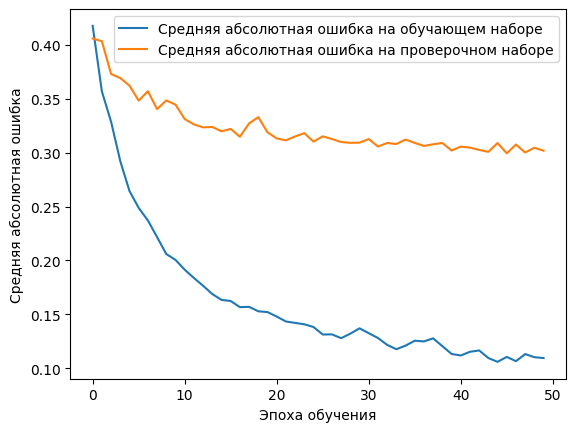

In [68]:
# Обучение модели на данных об опыте работы (должности)

model_exp = Sequential()
model_exp.add(Dense(30, activation='relu', input_dim=x_train_exp_01.shape[1]))
model_exp.add(Dense(800, activation='relu'))
model_exp.add(Dropout(0.3))
model_exp.add(Dense(1, activation='linear'))

model_exp.compile(optimizer=Adam(learning_rate=1e-3),
                  loss='mse',
                  metrics=['mae'])

history = model_exp.fit(x_train_exp_01,
                    y_train_scaled,
                    batch_size=256,
                    epochs=50,
                    validation_split=0.15,
                    verbose=1)

plot_history(history)

**Оценка результатов**


1968/1968 [==============================] - 3s 2ms/step
Средняя абсолютная ошибка: 9.408669014385245 

Реальное значение:  40.00  Предсказанное значение:  42.31  Разница:   2.31
Реальное значение:  40.00  Предсказанное значение:  54.86  Разница:  14.86
Реальное значение: 300.00  Предсказанное значение: 298.36  Разница:   1.64
Реальное значение: 180.00  Предсказанное значение: 151.64  Разница:  28.36
Реальное значение:  40.00  Предсказанное значение:  31.52  Разница:   8.48
Реальное значение: 200.00  Предсказанное значение: 205.51  Разница:   5.51
Реальное значение: 120.00  Предсказанное значение: 106.13  Разница:  13.87
Реальное значение:  50.00  Предсказанное значение:  50.59  Разница:   0.59
Реальное значение:  60.00  Предсказанное значение:  66.05  Разница:   6.05
Реальное значение:  70.00  Предсказанное значение:  71.04  Разница:   1.04


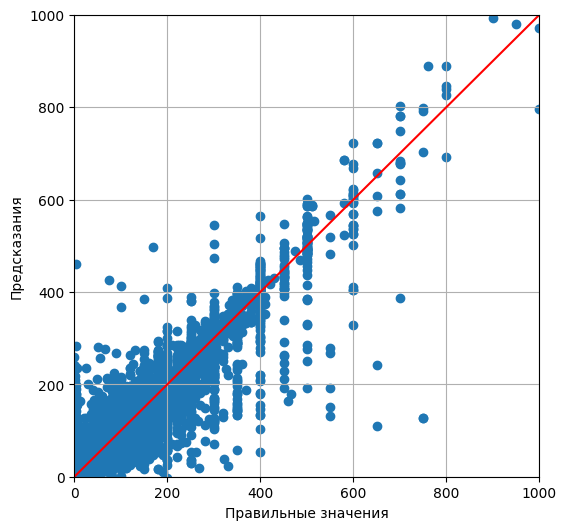

In [69]:
eval_net(model_exp, x_train_exp_01, y_train, y_scaler)

In [70]:
# Освобождение памяти
del model_simple, model_prof, model_exp

#Обучение нейронной сети класса Model (одна общая НС)

In [72]:
input1 = Input((x_train_01.shape[1],))
input2 = Input((x_train_prof_01.shape[1],))
input3 = Input((x_train_exp_01.shape[1],))

x1 = input1                               # Ветка 1
x1 = Dense(128, activation="relu")(x1)
x1 = Dense(1000, activation="tanh")(x1)
x1 = Dense(100, activation="relu")(x1)

x2 = input2                               # Ветка 2
x2 = Dense(20, activation="relu")(x2)
x2 = Dense(500, activation="relu")(x2)
x2 = Dropout(0.3)(x2)

x3 = input3                               # Ветка 3
x3 = Dense(30, activation="relu")(x3)
x3 = Dense(800, activation="relu")(x3)
x3 = Dropout(0.3)(x3)

x = concatenate([x1, x2, x3])             # Объединение трех веток

x = Dense(15, activation='relu')(x)       # Промежуточный слой
x = Dropout(0.5)(x)
x = Dense(1, activation='linear')(x)      # Финальный регрессирующий нейрон

# В Model передаются входы и выход
model_final = Model((input1, input2, input3), x)

Практическое отличие от модели Sequential в том, что мы определяем слои как переменные, и у каждого слоя указан его вход, то есть откуда ему приходят на вход данные, таким образом:

    x1 = input1                               
    x1 = Dense(128, activation="relu")(x1) #(x1) - то, откуда придут данные на полносвязный слой

Далее необходимо создать нашу нейронную сеть из класса Model. В качестве параметров нужно передать нейронные слои/слой, котрые являются входами сети, и нейронные слои/слой выхода сети.

    model_final = Model((input1, input2, input3), x)

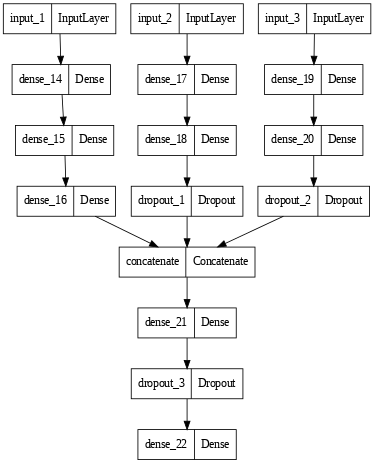

In [73]:
utils.plot_model(model_final, dpi=60)

Вот так выглядит структура созданной нейронной сети

Остальные шаги выполняются практически так же как и для последовательной модели. В методе fit в качестве обучающих данных нужно передать спискок из наборов данных для каждого входа нейронной сети.

In [74]:
model_final.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

history = model_final.fit([x_train_01, x_train_prof_01, x_train_exp_01],
                           y_train_scaled,
                           batch_size=256,
                           epochs=50,
                           validation_split=0.15,
                           verbose=1)

Epoch 1/50
210/210 [==============================] - 7s 14ms/step - loss: 0.6121 - mae: 0.4513 - val_loss: 0.5551 - val_mae: 0.4352
Epoch 2/50
210/210 [==============================] - 2s 9ms/step - loss: 0.4621 - mae: 0.3913 - val_loss: 0.4916 - val_mae: 0.3744
Epoch 3/50
210/210 [==============================] - 2s 9ms/step - loss: 0.3809 - mae: 0.3650 - val_loss: 0.4743 - val_mae: 0.3903
Epoch 4/50
210/210 [==============================] - 2s 9ms/step - loss: 0.3194 - mae: 0.3482 - val_loss: 0.4460 - val_mae: 0.3643
Epoch 5/50
210/210 [==============================] - 2s 10ms/step - loss: 0.2914 - mae: 0.3287 - val_loss: 0.4666 - val_mae: 0.3612
Epoch 6/50
210/210 [==============================] - 3s 12ms/step - loss: 0.2555 - mae: 0.3181 - val_loss: 0.4347 - val_mae: 0.3462
Epoch 7/50
210/210 [==============================] - 2s 9ms/step - loss: 0.2600 - mae: 0.3119 - val_loss: 0.4533 - val_mae: 0.3402
Epoch 8/50
210/210 [==============================] - 2s 9ms/step - loss:

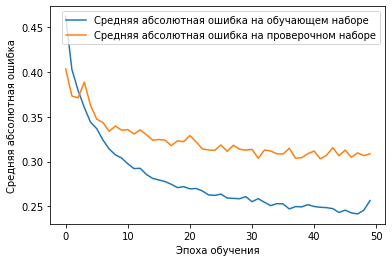

In [ ]:
plot_history(history)

Средняя абсолютная ошибка: 13.173538563491048 

Реальное значение:  40.00  Предсказанное значение:  41.27  Разница:   1.27
Реальное значение:  40.00  Предсказанное значение:  51.31  Разница:  11.31
Реальное значение: 300.00  Предсказанное значение: 267.95  Разница:  32.05
Реальное значение: 180.00  Предсказанное значение: 181.51  Разница:   1.51
Реальное значение:  40.00  Предсказанное значение:  42.64  Разница:   2.64
Реальное значение: 200.00  Предсказанное значение: 183.22  Разница:  16.78
Реальное значение: 120.00  Предсказанное значение: 112.22  Разница:   7.78
Реальное значение:  50.00  Предсказанное значение:  64.31  Разница:  14.31
Реальное значение:  60.00  Предсказанное значение:  63.30  Разница:   3.30
Реальное значение:  70.00  Предсказанное значение:  64.68  Разница:   5.32


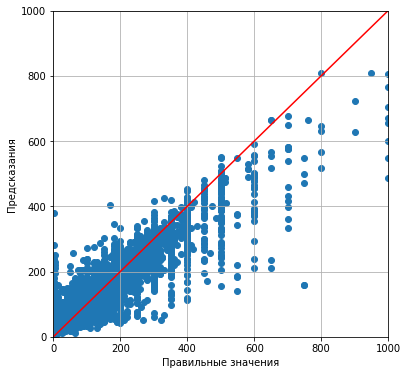

In [ ]:
eval_net(model_final, [x_train_01, x_train_prof_01, x_train_exp_01], y_train, y_scaler)

Вывод

Мы провели несколько экспериментов с имеющимися данными. Получили две модели, дающие довольно хороший результат:

линейная модель на основе анализа опыта работы (Ошибка: 9 тыс. руб)
нелинейная модель на основе анализа всех имеющихся данных (Ошибка: 13 тыс. руб)
Дальнейшая работа по улучшению показателей может вестись с двумя последними архитектурами

